<a href="https://colab.research.google.com/github/metaperson1/metaperson1/blob/main/InsuranceMarketingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # For running pandas_profiling
# ! pip install pandas==0.25.3
# ! pip install numpy==1.16.5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [7]:
insurance = pd.read_csv("/content/Medical_insurance_dataset.csv")
insurance.head(30)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [3]:
#Dropping User ID column 
insurance.drop( ["User ID"], axis= "columns", inplace= True)

In [8]:
#Mapping the values 1 and 0 to transform the target column
insurance["Purchased"] = insurance[ "Purchased"].apply(lambda x:1 if x == "purchased" else 0)

#Reading the data again
insurance.head (30)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [9]:
insurance.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [11]:
ProfileReport(insurance)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,5
Number of observations,400
Total Missing (%),0.0%
Total size in memory,15.8 KiB
Average record size in memory,40.3 B
Numeric,3
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


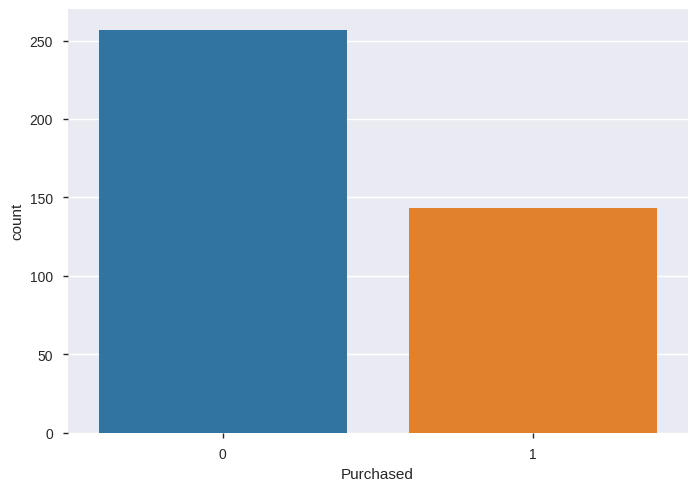

In [12]:
sns.countplot(x = "Purchased", data = insurance)

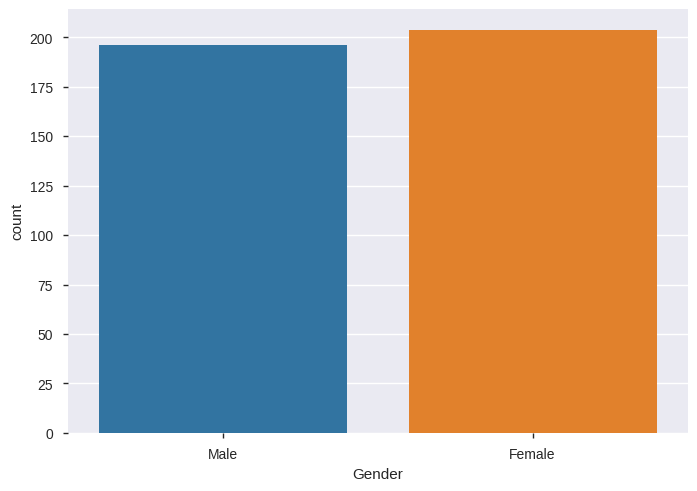

In [13]:
sns.countplot(x = "Gender", data = insurance)


In [15]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

In [16]:
X = insurance.drop(["Purchased"], axis= "columns") # droping the label variable (Purchased) from the data
y = insurance["Purchased"]

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [18]:
pd.get_dummies(insurance[ "Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [19]:
X = pd.get_dummies(X)
X.head()

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,1,0
3,15603246,27,57000,1,0
4,15804002,19,76000,0,1


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Gender_Female      400 non-null uint8
Gender_Male        400 non-null uint8
dtypes: int64(3), uint8(2)
memory usage: 10.3 KB


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [22]:
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)



LogisticRegression()

In [23]:
logistic_prediction = logisticmodel.predict(X_test)

In [24]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

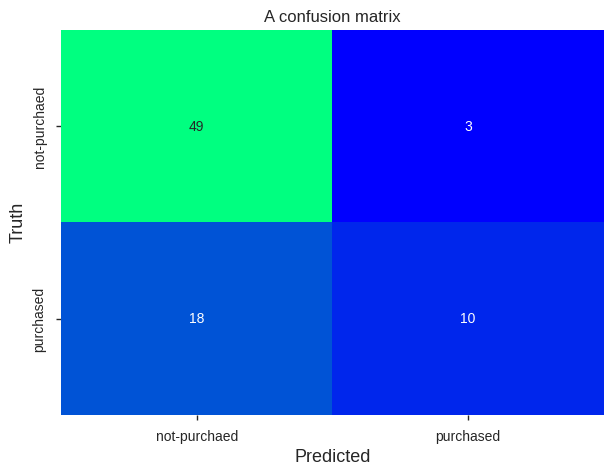

In [25]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchaed", "purchased"])

In [26]:
metrics.accuracy_score(y_test, logistic_prediction)

0.7375

In [27]:
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80

